<a href="https://colab.research.google.com/github/GarimaSingh0109/Student_Lifestyle_Analysis/blob/main/SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/student_lifestyle_dataset.csv")

# Show basic info
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB
None
   Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
0           1                  6.9                            3.8   
1           2                  5.3                            3.5  

 EDA (Exploratory Data Analysis)

In [2]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Value counts for Stress_Level
print(df['Stress_Level'].value_counts())


        Student_ID  Study_Hours_Per_Day  Extracurricular_Hours_Per_Day  \
count  2000.000000          2000.000000                    2000.000000   
mean   1000.500000             7.475800                       1.990100   
std     577.494589             1.423888                       1.155855   
min       1.000000             5.000000                       0.000000   
25%     500.750000             6.300000                       1.000000   
50%    1000.500000             7.400000                       2.000000   
75%    1500.250000             8.700000                       3.000000   
max    2000.000000            10.000000                       4.000000   

       Sleep_Hours_Per_Day  Social_Hours_Per_Day  \
count          2000.000000           2000.000000   
mean              7.501250              2.704550   
std               1.460949              1.688514   
min               5.000000              0.000000   
25%               6.200000              1.200000   
50%               7.5

Correlation Matrix

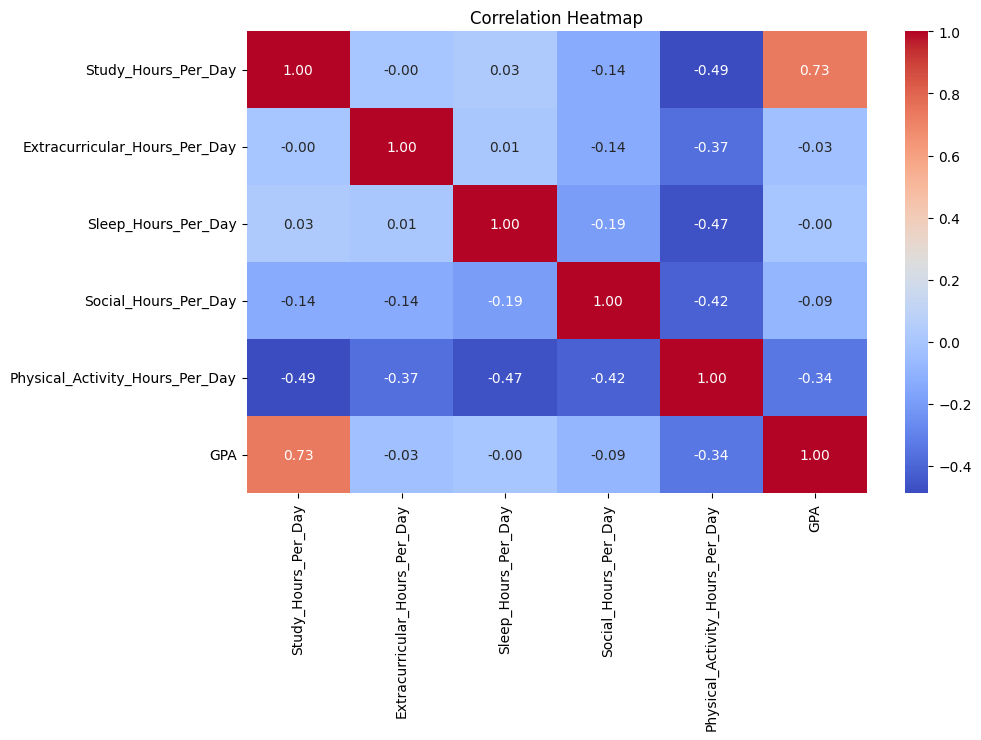

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd # Make sure pandas is imported in this cell as well

# Correlation matrix
plt.figure(figsize=(10, 6))
# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.drop(columns=["Student_ID"]).corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Visualization in Python (Matplotlib/Seaborn)

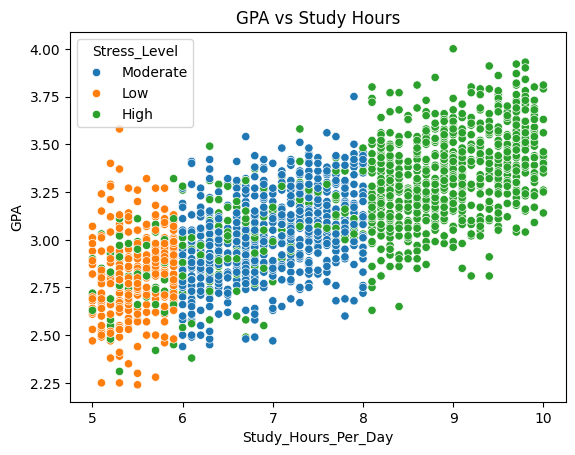

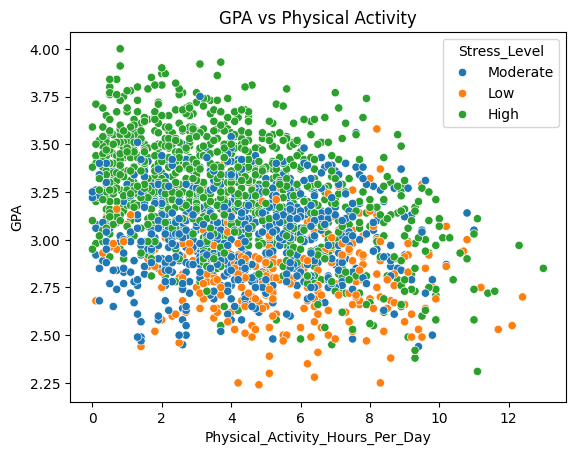

<ipython-input-5-7d79e5bb26a2>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Stress_Level', palette='Set2')


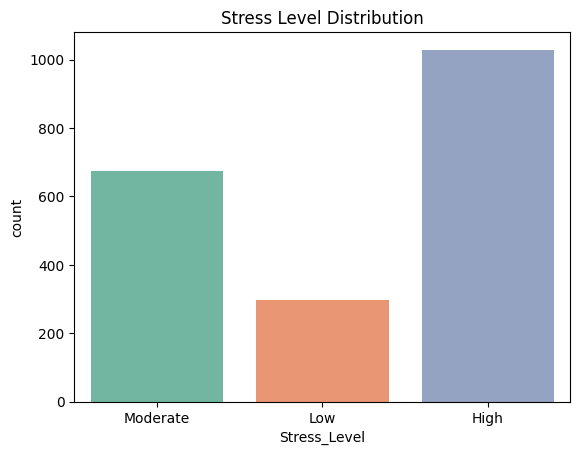

In [5]:
# GPA vs Study Hours
sns.scatterplot(data=df, x='Study_Hours_Per_Day', y='GPA', hue='Stress_Level')
plt.title('GPA vs Study Hours')
plt.show()

# GPA vs Physical Activity
sns.scatterplot(data=df, x='Physical_Activity_Hours_Per_Day', y='GPA', hue='Stress_Level')
plt.title('GPA vs Physical Activity')
plt.show()

# Stress Level Distribution
sns.countplot(data=df, x='Stress_Level', palette='Set2')
plt.title('Stress Level Distribution')
plt.show()


Descriptive Analysis

In [6]:
# Mean GPA by stress level
print(df.groupby('Stress_Level')['GPA'].mean())

# Mean study hours by stress level
print(df.groupby('Stress_Level')['Study_Hours_Per_Day'].mean())


Stress_Level
High        3.261973
Low         2.816869
Moderate    3.024837
Name: GPA, dtype: float64
Stress_Level
High        8.385034
Low         5.474411
Moderate    6.969585
Name: Study_Hours_Per_Day, dtype: float64


Predicting GPA (Regression)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']]
y = df['GPA']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


R2 Score: 0.5495191558155234
MSE: 0.04205834863704316


Predicting Stress Level (Classification)

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Encode labels
le = LabelEncoder()
df['Stress_Level_Code'] = le.fit_transform(df['Stress_Level'])

# Features and target
X = df[['Study_Hours_Per_Day', 'Sleep_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'Social_Hours_Per_Day']]
y = df['Stress_Level_Code']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Prediction and evaluation
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

        High       1.00      1.00      1.00       206
         Low       1.00      1.00      1.00        67
    Moderate       1.00      1.00      1.00       127

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



In [9]:
import joblib

# Save models
joblib.dump(model, "gpa_predictor.pkl")
joblib.dump(clf, "stress_level_classifier.pkl")


['stress_level_classifier.pkl']